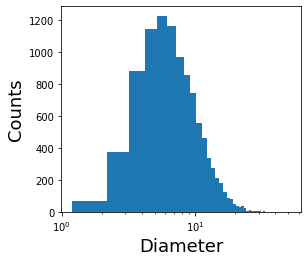

The number weighted average diameter is: 8.3437 +\- 4.4431
The Sauter mean diameter is: 13.8052 +\- 7.5849
The Debroucker diameter is: 17.9726 +\- 9.9539
The skewness and kurtosis are: 158.6020 and 9.7128
The Fisher skewness and excess kurtosis are: 1.8082 and 6.7128


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# INPUT PARAMETERS
N = 10000 # number of measurements
mu = 4 # average value for generating a distribution
mu2 = 2 # average value for generating a 2nd distribution
sigma = .5 # standard deviation for generating a dist.

# PLOTTING PARAMETERS
bins = 50 # number of bins to use in histogram
scale = 1.25 # scaling factor for figure size (preserves aspect ratio)
FS1 = 18 # Axes labels font size
FS2 = 14 # Legend font size

def moments(y,w,y0=0,m=1):
    """
    Calculate the mth moment of a discrete set of measurements of 'y' with
    each measurement weighted by the weights 'w', centered about the value
    of 'y0'.
    For example, the unweighted mean of the distribution is given by the 
    1st moment (m=1), centered about 0 (y0=0).
    """
    numerator = 0
    denominator = 0
    N = len(y)
    for i in range(N):
        numerator += w[i]*(y[i]-y0)**m
        denominator += w[i]
        
    moment = numerator/denominator
    return moment

# Create a set of fictional particle sizes by drawing from two types of 
# standard distributions: normal and lognormal
d1 = np.random.normal(mu,sigma,N)
d2 = np.random.lognormal(mu2,sigma,N)
diameters = d2

# Create figure size and view histogram
plt.figure(figsize=(3.5*scale,3*scale))
plt.hist(diameters,bins)
plt.xscale('log')
plt.xlabel('Diameter',fontsize=FS1)
plt.ylabel('Counts',fontsize=FS1)
plt.tight_layout()
plt.show()

# Create arrays for different weightings
w = np.ones_like(diameters) # equally weighted
w_sauter = np.pi*diameters**2 # surface area weighted
w_vol = diameters**3 # volume weighted

# Compute averages of the distribution of particles
mean = moments(diameters,w) 
sauter = moments(diameters,w_sauter)
debrouker = moments(diameters,w_vol)

# Compute the variances and standard deviations
variance = moments(diameters,w,y0=mean,m=2)
sauterVar = moments(diameters,w_sauter,y0=sauter,m=2)
debroukerVar = moments(diameters,w_vol,y0=debrouker,m=2)
std = np.sqrt(variance)
sauterStd = np.sqrt(sauterVar)
debroukerStd = np.sqrt(debroukerVar)

print('The number weighted average diameter is: %.4f +\- %.4f'%(mean,std))
print('The Sauter mean diameter is: %.4f +\- %.4f'%(sauter,sauterStd))
print('The Debroucker diameter is: %.4f +\- %.4f'%(debrouker,debroukerStd))

# Compute higher moments for the unweighted case
skewness = moments(diameters,w,y0 = mean,m=3)
fisherSkewness = skewness/std**3
kurtosis = moments(diameters,w,y0 = mean,m=4)/std**4
excessKurtosis = kurtosis - 3

print('The skewness and kurtosis are: %.4f and %.4f'%(skewness,kurtosis))
print('The Fisher skewness and excess kurtosis are: %.4f and %.4f'%(
    fisherSkewness,excessKurtosis))